In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simpleMap(tau,p):
    gamma = 10**(p[2]*np.tanh(np.log10(tau)/p[3]))
    newTau = p[0]*np.exp(-p[1]/((1 + 1/gamma + (1 - 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return newTau

In [13]:
tauArr = [0]
p4 = 0.5
p3 = 0.5653
p2 = 38.36
p1 = 0.5963
d = p1*np.exp(p2*2**(-0.25))
p = [d,p2,p3,p4]

x = np.linspace(0,2,1000)
y = simpleMap(x,p)
xi = [0]
yi = [0]

for i in range(500):
    tauArr.append(simpleMap(tauArr[i],p))
    xi.append(xi[-1])
    yi.append(simpleMap(xi[-1],p))
    xi.append(yi[-1])
    yi.append(yi[-1])

/tmp/ipykernel_79/3430175157.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(p[2]*np.tanh(np.log10(tau)/p[3]))


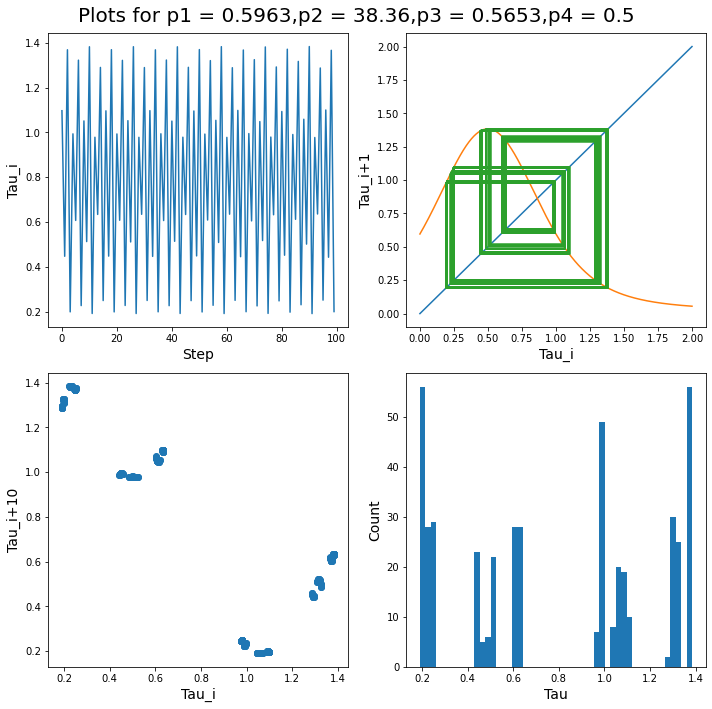

In [14]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0][0].plot(tauArr[100:200])
ax[0][0].set_xlabel("Step", fontsize = 14)
ax[0][0].set_ylabel("Tau_i", fontsize = 14)
offset = 19
ax[1][0].scatter(tauArr[50:-offset],tauArr[50+offset:])
ax[1][0].set_xlabel("Tau_i", fontsize = 14)
ax[1][0].set_ylabel("Tau_i+10", fontsize = 14)
ax[0][1].plot(x,x)
ax[0][1].plot(x,y)
ax[0][1].plot(xi[100:500],yi[100:500])
ax[0][1].set_xlabel("Tau_i", fontsize = 14)
ax[0][1].set_ylabel("Tau_i+1", fontsize = 14)
ax[1][1].hist(tauArr[50:],50)
ax[1][1].set_xlabel("Tau", fontsize = 14)
ax[1][1].set_ylabel("Count", fontsize = 14)
fig.suptitle("Plots for p1 = " + str(p1) + ",p2 = " + str(p2) + ",p3 = " + str(p3) + ",p4 = " + str(p4), fontsize = 20)
plt.tight_layout()
#plt.savefig("./timeSeries"+str(p1)+str(p2)+str(p3)+".png")
plt.show()

In [7]:
plt.savefig("./timeSeries"+str(p1)+str(p2)+str(p3)+".png")

<Figure size 432x288 with 0 Axes>